---
bibliography: references.bib

---

# HAMUX

> A New Class of  Deep Learning Library Built around **ENERGY**

In [ ]:
#| hide 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from IPython.display import display, HTML

In [ ]:
#| hide
warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
#|echo: false
display(HTML("""
<img src="https://raw.githubusercontent.com/bhoov/hamux/main/assets/header.png" alt="HAMUX Logo" width="400"/>
"""))

Part proof-of-concept, part functional prototype, HAMUX is designed to bridge modern AI architectures and Hopfield Networks.


**HAMUX**: A **H**ierarchical **A**ssociative **M**emory **U**ser e**X**perience


In [ ]:
#|echo: false
display(HTML("""
<div class="alert alert-info">
    🚧 <strong>HAMUX is in rapid development</strong>. Remember to specify the version when building off of HAMUX.
</div>
"""))

## A Universal Abstraction for Hopfield Networks

HAMUX fully captures the the energy fundamentals of Hopfield Networks and enables anyone to:

- 🧠 Build **DEEP** Hopfield nets

- 🧱 With modular **ENERGY** components

- 🏆 That resemble modern DL operations

**Every** architecture built using HAMUX is a *dynamical system* guaranteed to have a *tractable energy* function that *converges* to a fixed point. Our deep [Hierarchical Associative Memories](https://arxiv.org/abs/2107.06446) (HAMs) have several additional advantages over traditional [Hopfield Networks](http://www.scholarpedia.org/article/Hopfield_network) (HNs):

| Hopfield Networks (HNs) | Hierarchical Associative Memories (HAMs) |
|--------|------|
|HNs are only **two layers** systems | HAMs connect **any number** of layers|
|HNs model only **simple relationships** between layers | HAMs model **any complex but differentiable operation** (e.g., convolutions, pooling, attention, $\ldots$)| 
|HNs use only **pairwise synapses** | HAMs use **many-body synapses** |



## How does HAMUX work?

> **HAMUX** is a <a href="https://en.wikipedia.org/wiki/Hypergraph" >hypergraph</a> of 🌀neurons connected via 🤝synapses, an abstraction sufficiently general to model the complexity of connections used in modern AI architectures

HAMUX defines two fundamental building blocks of energy: the **🌀neuron layer** and the **🤝synapse**, connected via a **hypergraph**. 

In [ ]:
#|echo: false
display(HTML("""
<figure>
<img src="https://raw.githubusercontent.com/bhoov/hamux/main/assets/fig1.png" alt="HAMUX Overview" width="700"/>
<figcaption style="color:#999">Explaining the "energy fundamentals" of HAMUX (Layers and Synapses, left) using a 4-layer, 3-synapse example HAM (middle) that can be built using the code on the right.</figcaption>
</figure>
"""))

### 🌀Neuron Layers

Neuron layers are the recurrent unit of a HAM; that is, 🌀neurons keep a state that changes over time according to the dynamics of the system. These states always change to minimize the global energy function of the system.

For those of us familiar with traditional Deep Learning architectures, we are familiar with nonlinear activation functions like the `ReLU` and `SoftMax`. A neuron layer in HAMUX is exactly that: a nonlinear activation function defined on some neuron. However, we need to express the activation function as a convex **Lagrangian function** $\mathcal{L}$ that is the integral of the desired non-linearity such that the **derivative of the Lagrangian function** $\nabla \mathcal{L}$ is our desired non-linearity. E.g., consider the ReLU:

$$
\begin{align*}
\mathcal{L}(x) &:= \frac{1}{2} (\max(x, 0))^2\\
\nabla \mathcal{L} &= \max(x, 0) = \mathrm{relu}(x)\\
\end{align*}
$$


We need to define our activation layer in terms of the *Lagrangian* of the ReLU instead of the ReLU itself. Extending this constraint to other nonlinearities makes it possible to define the scalar energy for any neuron in a HAM. It turns out that many activation functions used in today's Deep Learning landscape are expressible as a Lagrangian. HAMUX is "batteries-included" for many common activation functions including `relu`s, `softmax`es, `sigmoid`s, `LayerNorm`s, etc. See our [documentation on Lagrangians](https://bhoov.github.io/hamux/lagrangians.html) for examples on how to implement efficient activation functions from Lagrangians in JAX. We show how to turn Lagrangians into usable energy building blocks in our [documentation on neuron layers](https://bhoov.github.io/hamux/layers.html).


### 🤝Synapses

A 🤝synapse ONLY sees activations of connected 🌀neuron layers. Its one job: report HIGH ⚡️energy if the connected activations are dissimilar and LOW ⚡️energy when they are aligned. Synapses can resemble convolutions, dense multiplications, even attention… Take a look at our [documentation on synapses](https://bhoov.github.io/hamux/synapses.html).

In [ ]:
#|echo: false
display(HTML("""
<div class="alert alert-info">
    🚨 <strong>Point of confusion</strong>: modern AI frameworks have <code>AttentionLayer</code>s and <code>ConvolutionalLayer</code>s. In HAMUX, these would be more appropriately called <code>AttentionSynapse</code>s and <code>ConvolutionalSynapse</code>s.
</div>
"""))


## Install

**From pip**:

```
pip install hamux
```

If you are using accelerators beyond the CPU you will need to additionally install the corresponding `jax` and `jaxlib` versions following [their documentation](https://github.com/google/jax#installation). E.g.,

```
pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
```


**From source**:

After cloning:
```
cd hamux
conda env create -f environment.yml
conda activate hamux
pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html # If using GPU accelerator
pip install -e .
pip install -r requirements-dev.txt  # To run the examples
```

## How to Use

In [ ]:
import hamux as hmx
import jax.numpy as jnp
import jax
import jax.tree_util as jtu

We can build a simple 4 layer HAM architecture using the following code

In [ ]:
#|output:false
layers = [
    hmx.TanhLayer((32,32,3)), # e.g., CIFAR Images
    hmx.SigmoidLayer((11,11,1000)), # CIFAR patches
    hmx.SoftmaxLayer((10,)), # CIFAR Labels
    hmx.SoftmaxLayer((1000,)), # Hidden Memory Layer
]

synapses = [
    hmx.ConvSynapse((3,3), strides=3),
    hmx.DenseSynapse(),
    hmx.DenseSynapse(),
]

connections = [
    ([0,1], 0),
    ([1,3], 1),
    ([2,3], 2),
]

rng = jax.random.PRNGKey(0)
param_key, state_key, rng = jax.random.split(rng, 3)
states, ham = hmx.HAM(layers, synapses, connections).init_states_and_params(param_key, state_key=state_key);

2022-12-07 18:37:07.282158: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Notice that we did not specify any output channel shapes in the synapses. The desired output shape is computed from the layers connected to each synapse during `hmx.HAM.init_states_and_params`.

We have two fundamental objects: `states` and `ham`. The `ham` object contains the connectivity structure of the HAM (e.g., layer+synapse+hypergraph information) alongside the **parameters** of the network. The `states` object is a list of length `nlayers` where each item is a tensor representing the neuron states of the corresponding layer. 



In [ ]:
assert len(states) == ham.n_layers
assert all([state.shape == layer.shape for state, layer in zip(states, ham.layers)])

We make it easy to run the dynamics of any HAM. Every `forward` function is defined external to the memory and can be modified to extract different memories from different layers, as desired. The general steps for any forward function are:

1. Initialize the dynamic states
2. Inject an initial state into the system
3. Run dynamics, calculating energy gradient at every point in time.
4. Return the layer state/activation of interest

In [ ]:
def fwd(model, x, depth=15, dt=0.1):
    """Assuming a trained HAM, run association with the HAM on batched inputs `x`"""
    # 1. Initialize model states at t=0. Account for batch size
    xs = model.init_states(x.shape[0])
    
    # Inject initial state
    xs[0] = x 

    energies = []
    for i in range(depth):
        energies.append(model.venergy(xs)) # If desired, observe the energy
        dEdg = model.vdEdg(xs)  # Calculate the gradients
        xs = jtu.tree_map(lambda x, stepsize, grad: x - stepsize * grad, xs, model.alphas(dt), dEdg)

    
    # Return probabilities of our label layer
    probs = model.layers[-2].activation(xs[-2])
    return jnp.stack(energies), probs

In [ ]:
batch_size=3
x = jax.random.normal(jax.random.PRNGKey(2), (batch_size, 32,32,3))
energies, probs = fwd(ham, x, depth=20, dt=0.3)
print(probs.shape) # batchsize, nclasses
assert jnp.allclose(probs.sum(-1), 1)

(3, 10)


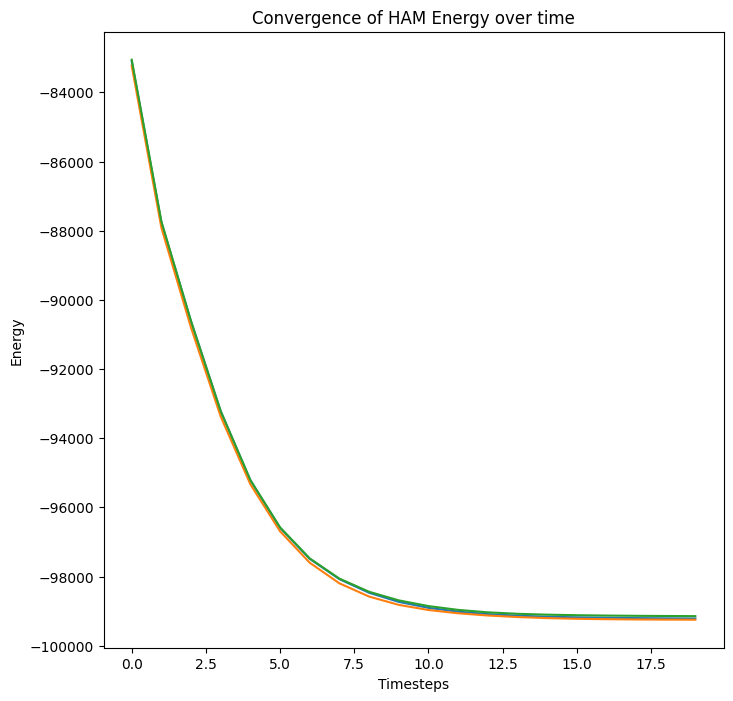

In [ ]:
#| echo: false
fig,ax = plt.subplots(1)
ax.plot(energies)
ax.set_title("Convergence of HAM Energy over time")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Energy");
plt.show(fig)

## The Energy Function vs the Loss Function

We use JAX's autograd to descend the energy function of our system AND the loss function of our task. The derivative of the energy is always taken wrt to our *states*; the derivative of the loss function is always taken wrt our *parameters*. During training, we change our parameters to optimize the *Loss Function*. During inference, we assume that parameters are constant.

**Autograd for Descending Energy**

Every `HAM` defines the energy function for our system, which is everything we need to compute memories of the system. Naively, we can calculate $\nabla_x E$: the derivative of the energy function wrt the *states* of each layer:

In [ ]:
stepsize = 0.01
fscore_naive = jax.grad(ham.energy)
next_states = jax.tree_util.tree_map(lambda state, score: state - stepsize, states, fscore_naive(states))

But it turns out we improve the efficiency of our network if we instead take $\nabla_g E$: the derivative of the energy wrt the *activations* instead of the *states*. They have the same local minima, even though the trajectory to get there is different. Some nice terms cancel, and we get:

$$\nabla_g E_\text{HAM} = x + \nabla_g E_\text{synapse}$$

In [ ]:
stepsize = 0.01
def fscore_smart(xs):
    gs = ham.activations(xs)
    return jax.tree_util.tree_map(lambda x, nabla_g_Esyn: x + nabla_g_Esyn, xs, jax.grad(ham.synapse_energy)(gs))

next_states = jax.tree_util.tree_map(lambda state, score: state - stepsize, states, fscore_smart(states))

## Citation


Work is a collaboration between the [MIT-IBM Watson AI Lab](https://mitibmwatsonailab.mit.edu/) and the [PoloClub](https://poloclub.github.io/) @ GA Tech